### NLP Homework: 6
Sean Kennedy, SMU

Searching For Richard Feynman

#### 1.	Evaluate text similarity of Amazon book search results by doing the following:

***Do a book search on Amazon. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results.***



In [104]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import requests

%matplotlib inline
pd.options.display.max_colwidth=500

### Code

In [105]:
def unique_params(parameter_search):
    all_keys = sorted(parameter_search)
    combinations = it.product(*(parameter_search[key] for key in all_keys))
    combinations = [
        dict(zip(sorted(parameter_search.keys()), params))
        for params in combinations
    ]
    return list(combinations)

def tokenize_text(book_text):
    TOKEN_PATTERN = r'\s+'
    regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps=True)
    word_tokens = regex_wt.tokenize(book_text)
    return word_tokens

def remove_characters_after_tokenization(tokens):
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
    return filtered_tokens

def convert_to_lowercase(tokens):
    return [token.lower() for token in tokens if token.isalpha()]

def remove_stopwords(tokens):
    stopword_list = nltk.corpus.stopwords.words('english')
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

def apply_lemmatization(tokens, wnl=WordNetLemmatizer()):
    return [wnl.lemmatize(token) for token in tokens]

def clean_texts(book_texts):
    clean_books = []
    for book in book_texts:
        book_i = tokenize_text(book)
        book_i = remove_characters_after_tokenization(book_i)
        book_i = convert_to_lowercase(book_i)
        book_i = remove_stopwords(book_i)
        book_i = apply_lemmatization(book_i)
        clean_books.append(book_i)
    return clean_books

def plot_heatmap(df_hm, xlabels, ylabels):
    sns.set(style="white")

    f, ax = plt.subplots(figsize=(18, 18))

    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    mask = np.zeros_like(df_hm, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(df_hm, mask=mask, cmap=cmap, center=0.5,
            xticklabels=xlabels, yticklabels=ylabels,
            square=True, linewidths=.5, fmt='.2f',
            annot=True, cbar_kws={"shrink": .5}, vmax=1)

    ax.set_title("cosine similarity scores").set_fontsize(15)
    ax.set_xlabel("")
    ax.set_ylabel("")

    return ax

def compute_cosine_similarity(pair):

    book1, book2 = pair

    book1_index = int(book1.split("_")[1])
    book2_index = int(book2.split("_")[1])

    book1_fm = feature_matrix.toarray()[book1_index]
    book2_fm = feature_matrix.toarray()[book2_index]

    manual_cosine_similarity = np.dot(book1_fm, book2_fm)

    return manual_cosine_similarity



In [106]:
books = requests.get('https://www.amazon.com/s?k=Richard+Feynman&i=stripbooks&ref=nb_sb_noss_2', verify=False)

c:\users\skennedy\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


***a) Do a book search on Amazon. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results***

In [107]:
from bs4 import BeautifulSoup

In [108]:
soup = BeautifulSoup(books.text)

In [109]:
soup

<!--
        To discuss automated access to Amazon data please contact api-services-support@amazon.com.
        For information about migrating to our APIs refer to our Marketplace APIs at https://developer.amazonservices.com/ref=rm_5_sv, or our Product Advertising API at https://affiliate-program.amazon.com/gp/advertising/api/detail/main.html/ref=rm_5_ac for advertising use cases.
--><!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>Sorry! Something went wrong!</title>
<style>
  html, body {
    padding: 0;
    margin: 0
  }

  img {
    border: 0
  }

  #a {
    background: #232f3e;
    padding: 11px 11px 11px 192px
  }

  #b {
    position: absolute;
    left: 22px;
    top: 12px
  }

  #c {
    position: relative;
    max-width: 800px;
    padding: 0 40px 0 0
  }

  #e, #f {
    height: 35px;
    border: 0;
    font-size: 1em
  }


***Unfortunately, ammazon doesn't allow programmatic access to their data for free :(***



In [110]:
#search string = Richard Feynman
book_titles = [
    'The Grand Biocentric Design: How Life Creates Reality',
    "Surely You're Joking, Mr. Feynman!: Adventures of a Curious Character",
    'Six Easy Pieces: Essentials of Physics Explained by Its Most Brilliant Teacher',
    'The Feynman Lectures on Physics, boxed set: The New Millennium Edition',
    'The Pleasure of Finding Things Out: The Best Short Works of Richard P. Feynman (Helix Books)',
    '"What Do You Care What Other People Think?": Further Adventures of a Curious Character',
    'The Meaning of It All: Thoughts of a Citizen-Scientist',
    'Genius: The Life and Science of Richard Feynman',
    'Six Not-So-Easy Pieces: Einstein s Relativity, Symmetry, and Space-Time',
    'Darwin in a New Key: Evolution and the Question of Value',
    'Quantum Mechanics: A Modern Development (2Nd Edition)',
    'QED: The Strange Theory of Light and Matter (Princeton Science Library)',
    'Perfectly Reasonable Deviations from the Beaten Track',
    'The Feynman Lectures on Physics, Vol. I: The New Millennium Edition: Mainly Mechanics, Radiation, and Heat (Volume 1)',
    'The Feynman Lectures on Physics - Vol. I, II & III Bundle',
    'The Character of Physical Law, with new foreword (The MIT Press)',
    "Feynman's Tips on Physics: Reflections, Advice, Insights, Practice - A Problem-Solving Supplement to the Feynman Lectures on Physics",
    'Exercises for the Feynman Lectures on Physics',
    'Quantum Mechanics and Path Integrals: Emended Edition (Dover Books on Physics)',
    'Relativity: The Special and General Theory (Dover Books on Physics)',
    'Quantum Mechanics: Basic & Advanced Concepts for Beginners',
    'The Code Breaker: Jennifer Doudna, Gene Editing, and the Future of the Human Race',
    'No-Nonsense Electrodynamics: A Student Friendly Introduction',
    "Quantum Man: Richard Feynman's Life in Science (Great Discoveries)",
    "Don't You Have Time to Think?"
]

In [111]:
len(book_titles)

25

***b) In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one.***




In [112]:
bookids_vals = ["book_" + str(i) for i in range(len(book_titles))]
book_dict = dict(zip(bookids_vals, book_titles))
book_ids = list(book_dict.keys())
book_pairs = []
for i, v in enumerate(book_ids):
    for j in book_ids[i+1:]:
        book_pairs.append((book_ids[i],j))

In [113]:
clean_books = cleanTextBooks(book_titles)
norm_clean_books = [' '.join(text) for text in clean_books]
display(norm_clean_books)

['grand biocentric design life creates reality',
 'surely youre joking mr feynman adventure curious character',
 'six easy piece essential physic explained brilliant teacher',
 'feynman lecture physic boxed set new millennium edition',
 'pleasure finding thing best short work richard p feynman helix book',
 'care people think adventure curious character',
 'meaning thought citizenscientist',
 'genius life science richard feynman',
 'six notsoeasy piece einstein relativity symmetry spacetime',
 'darwin new key evolution question value',
 'quantum mechanic modern development edition',
 'qed strange theory light matter princeton science library',
 'perfectly reasonable deviation beaten track',
 'feynman lecture physic vol new millennium edition mainly mechanic radiation heat volume',
 'feynman lecture physic vol ii iii bundle',
 'character physical law new foreword mit press',
 'feynman tip physic reflection advice insight practice problemsolving supplement feynman lecture physic',
 'exer

In [114]:
vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))
feature_matrix = vectorizer.fit_transform(norm_clean_books).astype(float)

In [115]:
similarity = [compute_cosine_similarity(pair) for pair in book_pairs]
df = pd.DataFrame({'pair': book_pairs, 'similarity': similarity})
display(df.sort_values(['similarity']).head(10))
display(df.sort_values(['similarity']).tail(10))

,pair,similarity
0,"(book_0, book_1)",0.0
171,"(book_8, book_16)",0.0
172,"(book_8, book_17)",0.0
173,"(book_8, book_18)",0.0
175,"(book_8, book_20)",0.0
176,"(book_8, book_21)",0.0
177,"(book_8, book_22)",0.0
178,"(book_8, book_23)",0.0
179,"(book_8, book_24)",0.0
180,"(book_9, book_10)",0.0


,pair,similarity
237,"(book_13, book_17)",0.265247
234,"(book_13, book_14)",0.297101
279,"(book_18, book_19)",0.301962
202,"(book_10, book_18)",0.341695
82,"(book_3, book_17)",0.342473
247,"(book_14, book_17)",0.346090
264,"(book_16, book_17)",0.380019
27,"(book_1, book_5)",0.388563
78,"(book_3, book_13)",0.464900
162,"(book_7, book_23)",0.517902


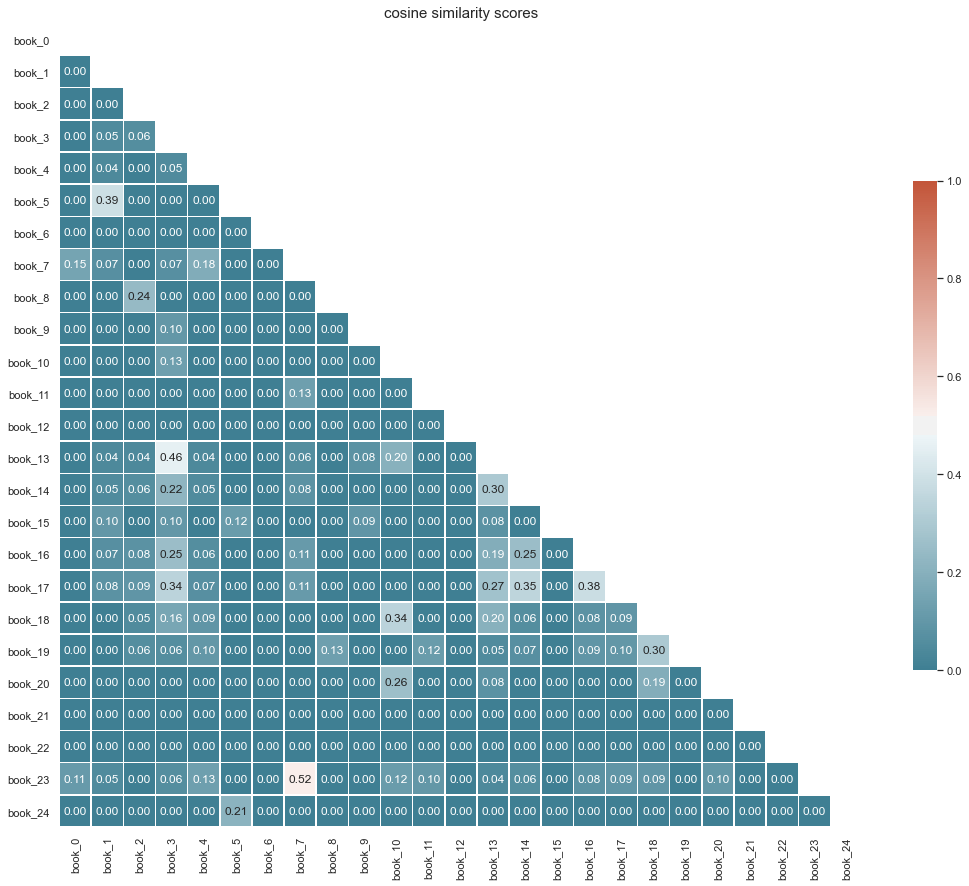

In [116]:
# initialize an empty dataframe grid based on the length of book titles
df_hm = pd.DataFrame({'ind': range(len(book_titles)), 'cols': range(len(book_titles)), 'vals': pd.Series(np.zeros(len(book_titles)))})

# convert to a matrix for the heatmap
df_hm = df_hm.pivot(index='ind', columns='cols').fillna(0)

# make a copy
df_temp = df.copy()

# convert list of tuples into 2 lists
list1 = []
list2 = []
for item1, item2 in df_temp.pair:
    list1.append(item1)
    list2.append(item2)

# add two columns to df_temp
df_temp['book1'] = list1
df_temp['book2'] = list2

# drop the pair as it not needed
df_temp.drop('pair', axis=1, inplace=True)

# extract index so that you can construct pairs
df_temp['book1'] = df_temp['book1'].apply(lambda x: int(x.split('_')[-1]))
df_temp['book2'] = df_temp['book2'].apply(lambda x: int(x.split('_')[-1]))

# create tuples (0, 1, similarity)
df_temp['pairs'] = list(zip(df_temp.book1, df_temp.book2, round(df_temp.similarity, 2)))

# to get lower diagonal, swap the rows and cols.
for row, col, similarity in df_temp.pairs:
    df_hm.iloc[col, row] = similarity

ax = plot_heatmap(df_hm, book_ids, book_ids)

***c) Which two titles are the most similar to each other? Which are the most dissimilar? Where do they rank, among the first 24 results?***

Book 7 and book 23 had the highest cosine similarity score  (0.52) which is not surprising given that that they are:

- 'Genius: The Life and Science of Richard Feynman'

- Quantum Man: Richard Feynman's Life in Science (Great Discoveries)

Many of our entries tied with similarity scores of 0 (219 pairs). Of all of the book titles, book title 3 ('The Feynman Lectures on Physics, boxed set: The New Millennium Edition') was the most similar to the other elements - in particular books 13/14 and 17/18 which are accompaniments to the legendary publication "The Feynman Lectures on Physics". The fact that this book ranks 3rd in the Amazon search is not surprising - it's one of the most popular texts of its type to ever be printed. The texts which appeared lower in the search were still all very relevant to the search topic, since the search topic is both the subject of much writing and the author of a myriad of texts.

In [117]:
book_titles[7], book_titles[23], book_titles[3], df.query('similarity == 0').shape[0], book_titles[13:15], book_titles[16:18] 

('Genius: The Life and Science of Richard Feynman',
 "Quantum Man: Richard Feynman's Life in Science (Great Discoveries)",
 'The Feynman Lectures on Physics, boxed set: The New Millennium Edition',
 219,
 ['The Feynman Lectures on Physics, Vol. I: The New Millennium Edition: Mainly Mechanics, Radiation, and Heat (Volume 1)',
  'The Feynman Lectures on Physics - Vol. I, II & III Bundle'],
 ["Feynman's Tips on Physics: Reflections, Advice, Insights, Practice - A Problem-Solving Supplement to the Feynman Lectures on Physics",
  'Exercises for the Feynman Lectures on Physics'])

***2.	Now evaluate using a major search engine.***

***a) Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results.***

'The Feynman Lectures on Physics, boxed set: The New Millennium Edition'

and

'Six Easy Pieces: Essentials of Physics Explained by Its Most Brilliant Teacher'

The Feynman Lectures on Physics, boxed set: The New ...www.abebooks.com › plp
Jan 27, 2011 — AbeBooks.com: The Feynman Lectures on Physics, boxed set: The New Millennium Edition (9780465023820) by Feynman, Richard P.; ...

The Feynman Lectures on Physics – Daniel Schmachtenbergercivilizationemerging.com › resources › the-feynman-le...
The Feynman Lectures on Physics, boxed set: The New Millennium Edition - Richard P. Feynman, Robert B. Leighton, Matthew Sands. The legendary ...



Six Easy Pieces: Essentials of Physics Explained by Its Most ...blas.com › six-easy-pieces
Nov 30, 2019 — Six Easy Pieces: Essentials of Physics Explained by Its Most Brilliant Teacher by Richard Feynman. Summary. A distillation of some of the key ...


Formats and Editions of Six easy pieces : [essentials of ...www.worldcat.org › title › oclc › editions
Title / Author, Type, Language, Date / Edition, Publication. 1. Six easy pieces : [essentials of physics, explained by its most brilliant teacher], 1. Six easy pieces ...


***b) Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title).***

In [118]:
search_1 = "The Feynman Lectures on Physics, boxed set: The New ...www.abebooks.com › plp Jan 27, 2011 — AbeBooks.com: The Feynman Lectures on Physics, boxed set: The New Millennium Edition (9780465023820) by Feynman, Richard P.; ..."
book = "The Feynman Lectures on Physics, boxed set: The New Millennium Edition"

search_list = [search_1, book]

searchID_vals = ["item_" + str(i) for i in range(len(search_list))]

search_dict = dict(zip(searchID_vals, search_list))

search_ids = list(search_dict.keys())

search_pairs = []

for i, v in enumerate(search_ids):
    for j in search_ids[i+1:]:
        search_pairs.append((search_ids[i],j))



In [119]:
clean_search = cleanTextBooks(search_list)
norm_clean_search = [' '.join(text) for text in clean_search]
print(norm_clean_search)

vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))
feature_matrix = vectorizer.fit_transform(norm_clean_search).astype(float)

pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in search_pairs]
df = pd.DataFrame({'pair': search_pairs, 'similarity': pairwise_cosine_similarity})
display(df.head())



['feynman lecture physic boxed set new wwwabebookscom plp jan abebookscom feynman lecture physic boxed set new millennium edition feynman richard p', 'feynman lecture physic boxed set new millennium edition']


,pair,similarity
0,"(item_0, item_1)",0.829485


In [120]:
# Compare the 20th search entry to the book
search20 = "The Feynman Lectures on Physics – Daniel Schmachtenbergercivilizationemerging.com › resources › the-feynman-le... The Feynman Lectures on Physics, boxed set: The New Millennium Edition - Richard P. Feynman, Robert B. Leighton, Matthew Sands. The legendary ..."
search_list = [search20, book]

searchID_vals = ["search_" + str(i) for i in range(len(search_list))]

search_dict = dict(zip(searchID_vals, search_list))

search_ids = list(search_dict.keys())

search_pairs = []
for i, v in enumerate(search_ids):
    for j in search_ids[i+1:]:
        search_pairs.append((search_ids[i],j))


In [121]:
clean_search = cleanTextBooks(search_list)
norm_clean_search = [' '.join(text) for text in clean_search]
print(norm_clean_search)

['feynman lecture physic daniel schmachtenbergercivilizationemergingcom resource thefeynmanle feynman lecture physic boxed set new millennium edition richard p feynman robert b leighton matthew sand legendary', 'feynman lecture physic boxed set new millennium edition']


In [122]:
vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))
feature_matrix = vectorizer.fit_transform(norm_clean_search).astype(float)

In [123]:
pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in search_pairs]
df = pd.DataFrame({'pair': search_pairs, 'similarity': pairwise_cosine_similarity})
display(df.head())

,pair,similarity
0,"(search_0, search_1)",0.656585


In [124]:
search_1 = "Six Easy Pieces: Essentials of Physics Explained by Its Most ...blas.com › six-easy-pieces Nov 30, 2019 — Six Easy Pieces: Essentials of Physics Explained by Its Most Brilliant Teacher by Richard Feynman. Summary. A distillation of some of the key ..."
book = 'Six Easy Pieces: Essentials of Physics Explained by Its Most Brilliant Teacher'

search_list = [search_1, book]

searchID_vals = ["item_" + str(i) for i in range(len(search_list))]

search_dict = dict(zip(searchID_vals, search_list))

search_ids = list(search_dict.keys())

search_pairs = []

for i, v in enumerate(search_ids):
    for j in search_ids[i+1:]:
        search_pairs.append((search_ids[i],j))

In [125]:
clean_search = cleanTextBooks(search_list)
norm_clean_search = [' '.join(text) for text in clean_search]
print(norm_clean_search)

vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))
feature_matrix = vectorizer.fit_transform(norm_clean_search).astype(float)

pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in search_pairs]
df = pd.DataFrame({'pair': search_pairs, 'similarity': pairwise_cosine_similarity})
display(df.head())


['six easy piece essential physic explained blascom sixeasypieces nov six easy piece essential physic explained brilliant teacher richard feynman summary distillation key', 'six easy piece essential physic explained brilliant teacher']


,pair,similarity
0,"(item_0, item_1)",0.765563


In [126]:
search_20 = "Formats and Editions of Six easy pieces : [essentials of ...www.worldcat.org › title › oclc › editions Title / Author, Type, Language, Date / Edition, Publication. 1. Six easy pieces : [essentials of physics, explained by its most brilliant teacher], 1. Six easy pieces ..."
book = 'Six Easy Pieces: Essentials of Physics Explained by Its Most Brilliant Teacher'

search_list = [search_20, book]

searchID_vals = ["item_" + str(i) for i in range(len(search_list))]

search_dict = dict(zip(searchID_vals, search_list))

search_ids = list(search_dict.keys())

search_pairs = []

for i, v in enumerate(search_ids):
    for j in search_ids[i+1:]:
        search_pairs.append((search_ids[i],j))

In [128]:
clean_search = cleanTextBooks(search_list)
norm_clean_search = [' '.join(text) for text in clean_search]
print(norm_clean_search)

vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))
feature_matrix = vectorizer.fit_transform(norm_clean_search).astype(float)

pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in search_pairs]
df = pd.DataFrame({'pair': search_pairs, 'similarity': pairwise_cosine_similarity})
display(df.head())

['format edition six easy piece essential wwwworldcatorg title oclc edition title author type language date edition publication six easy piece essential physic explained brilliant teacher six easy piece', 'six easy piece essential physic explained brilliant teacher']


,pair,similarity
0,"(item_0, item_1)",0.606411


***c) Which one has the highest similarity measure?***

In both instances the first result scored significantly higher than the 20th result (0.83/0.65 and .77/0.61). Interestingly, the dropoff in cosine similarity between the 1st and 20th results was somewhat linear (i.e the gap between scores was almost identical). 